# <center>Analyzing Star Wars Survey Data</center>

We will be analysing data from a poll of over 1100 Star Wars fans. The website FiveThirtyEight ran the poll before the release of the release of *Star Wars: The Force Awakens*.  The poll collected demographic data of the respondants as well favorite characters, ranking their favorite Star Wars movie, and more.  

The data is available on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).  You can read more about the poll in [this article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

We will analyze responses to some of the questions accross gender lines and education level.

The following is a selection of the column data:

```RespondentID``` - An anonymized ID for the respondent (person taking the survey)
<br>
```Gender``` - The respondent's gender
<br>
```Age``` - The respondent's age
<br>
```Education``` - The respondent's education level
<br>
```Location (Census Region)``` - The respondent's location
<br>
```Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.``` - a listing of several characters and the oppertunity for the repsondant to rate each one
<br>
```Which of the following Star Wars films have you seen? Please select all that apply.```  - a listing of each film where the respondant indicates if they have seen it

## Read In The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Read in the data
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning The Multiple Answer Questions

In [2]:
# Remove rows where 'RespondentID' is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars = star_wars.copy()

### Which Movies Has the Respondant Seen?

The following columns are check box answers as to whether the respondant has seen any of the first six Star Wars films.  

The columns for this question are:

```Which of the following Star Wars films have you seen? Please select all that apply.``` - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
<br>```Unnamed: 4``` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
<br>```Unnamed: 5``` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
<br>```Unnamed: 6``` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
<br>```Unnamed: 7``` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
<br>```Unnamed: 8``` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie and we will assume that they didn't see it.  

First we will convert the columns to boolean for easier analysis and then we will change the column names to something more descriptive.

In [3]:
# Create boolean map
movie_map = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan:False
            }

# Apply the boolean map to the columns
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movie_map)

# Create new column names map
col_map_seen = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'episode_1',
    'Unnamed: 4': 'episode_2',
    'Unnamed: 5': 'episode_3',
    'Unnamed: 6': 'episode_4',
    'Unnamed: 7': 'episode_5',
    'Unnamed: 8': 'episode_6'
               }

# Change column names
star_wars = star_wars.rename(columns = col_map_seen)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars['episode_4'].value_counts()

True     607
False    579
Name: episode_4, dtype: int64

### Favorite Movie Rankings

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

The columns for this question are:

```Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.``` - Ranking of Episode 1
<br>
```Unnamed: 10``` - Ranking of Episode 2
<br>
```Unnamed: 11``` - Ranking of Episode 3
<br>
```Unnamed: 12``` - Ranking of Episode 4
<br>
```Unnamed: 13``` - Ranking of Episode 5
<br>
```Unnamed: 14``` - Ranking of Episode 6 

In [5]:
# Convert to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the ranking columns
col_map_rank = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
               }
star_wars = star_wars.rename(columns = col_map_rank)
star_wars.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Analysis

## How Men & Women Rank Their Favorite Movies

In [6]:
# Select just the ranking columns
star_wars_gender = star_wars.iloc[:,9:15]
star_wars_gender.head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [7]:
# use df.join() to append the 'Gender' column
star_wars_rank_gender = star_wars_gender.join(star_wars['Gender'])
star_wars_rank_gender.head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Gender
1,3.0,2.0,1.0,4.0,5.0,6.0,Male
2,NaN,NaN,NaN,NaN,NaN,NaN,Male
3,1.0,2.0,3.0,4.0,5.0,6.0,Male
4,5.0,6.0,1.0,2.0,4.0,3.0,Male
5,5.0,4.0,6.0,2.0,1.0,3.0,Male


In [8]:
# Transform the dataframe using .melt() to make it easier to plot
star_wars_gender_melt = pd.melt(star_wars_rank_gender,
                                id_vars='Gender',
                                value_vars=star_wars_rank_gender.columns[0:6])
star_wars_gender_melt.head()

,Gender,variable,value
0,Male,ranking_1,3.0
1,Male,ranking_1,NaN
2,Male,ranking_1,1.0
3,Male,ranking_1,5.0
4,Male,ranking_1,5.0


<ipython-input-9-60397ea62f82>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),fontsize=16)


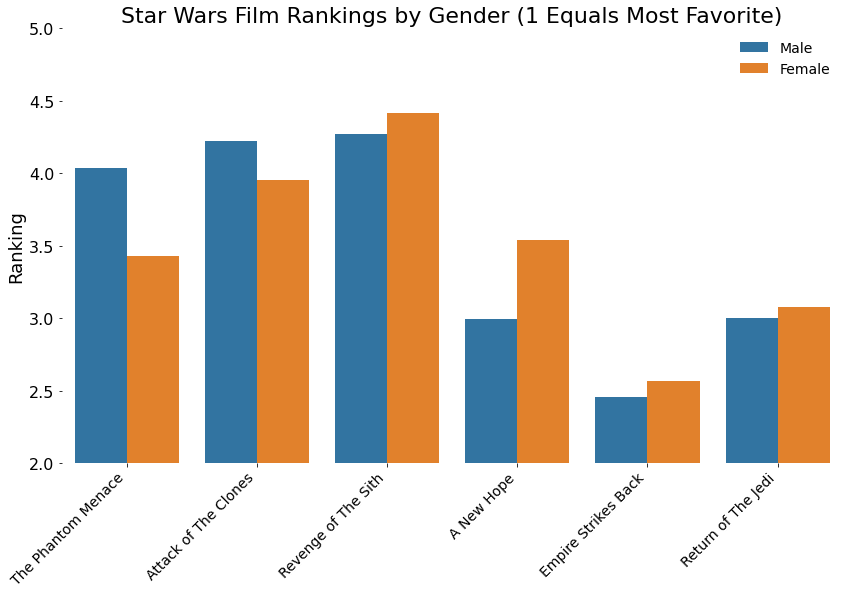

In [9]:
#Plot
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(
                 data=star_wars_gender_melt,
                 x='variable',
                 y='value',
                 hue='Gender',
                 ci=None
                )

# Plot Aesthetics
ax.set_ylim(2,5)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('Ranking', fontsize=18)
ax.set_xticklabels(
                   ['The Phantom Menace','Attack of The Clones',
                   'Revenge of The Sith','A New Hope','Empire Strikes Back',
                   'Return of The Jedi'],
                   fontsize=14,
                   rotation=45,
                   ha='right'
                  )
ax.set_yticklabels(ax.get_yticks(),fontsize=16)
ax.set_title('Star Wars Film Rankings by Gender (1 Equals Most Favorite)', fontsize=22)
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.legend(frameon=False, markerscale=10, fontsize=14)

#### Observations

- There is not much difference between the genders:  both like Empire Strikes Back the most while Revenge of The Sith is the least favorite.
<br>
- A New Hope has the largest disparity with males rating it significantly higher than females.

## How Many Respondants Have Seen Each Movie?

In [10]:
# Select only the relevant columns
star_wars_seen = star_wars.iloc[:,3:9]
star_wars_seen.head()

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [11]:
# Use .join() to append the 'Gender' column
star_wars_seen_gender = star_wars_seen.join(star_wars['Gender'])
star_wars_seen_gender.head()

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,Gender
1,True,True,True,True,True,True,Male
2,False,False,False,False,False,False,Male
3,True,True,True,False,False,False,Male
4,True,True,True,True,True,True,Male
5,True,True,True,True,True,True,Male


In [12]:
# Use .melt() to tranform the data
star_wars_seen_gender_melt = pd.melt(star_wars_seen_gender,
                                     id_vars='Gender',
                                     value_vars=star_wars_seen_gender.columns[0:6])
star_wars_seen_gender_melt.head()

,Gender,variable,value
0,Male,episode_1,True
1,Male,episode_1,False
2,Male,episode_1,True
3,Male,episode_1,True
4,Male,episode_1,True


In [13]:
# Use .groupby() to further consolidate the data and calculate totals
seen_groupby = star_wars_seen_gender_melt.groupby(['Gender', 'variable'])['value'].sum().reset_index()
seen_groupby['value'] = seen_groupby['value'].astype(int)
seen_groupby.head()

,Gender,variable,value
0,Female,episode_1,298
1,Female,episode_2,237
2,Female,episode_3,222
3,Female,episode_4,255
4,Female,episode_5,353


<ipython-input-14-02ade5cb6cb6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),fontsize=16)


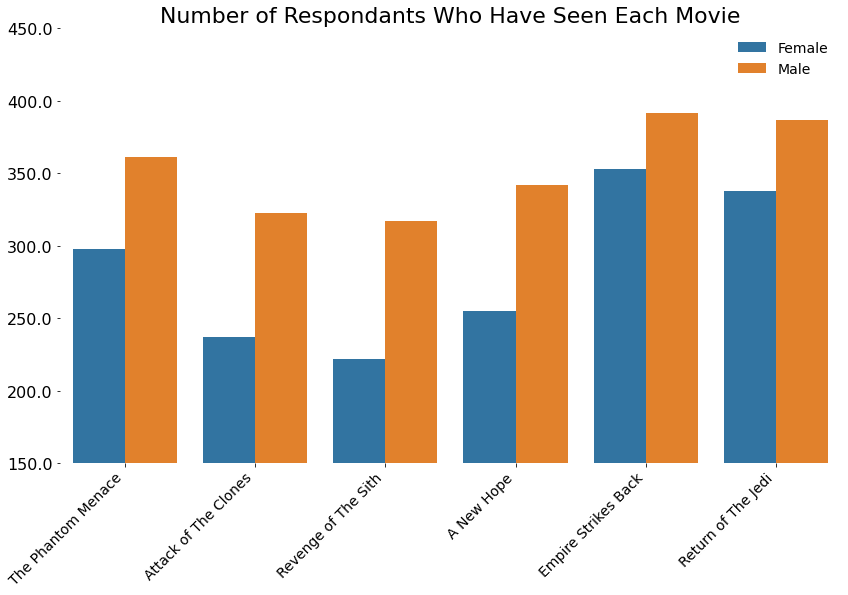

In [14]:
#Plot
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(
                 data=seen_groupby,
                 x='variable',
                 y='value',
                 hue='Gender',
                 ci=None
                )

# Plot Aesthetics
ax.set_ylim(150,450)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('', fontsize=18)
ax.set_xticklabels(
                   ['The Phantom Menace','Attack of The Clones',
                   'Revenge of The Sith','A New Hope','Empire Strikes Back',
                   'Return of The Jedi'],
                   fontsize=14,
                   rotation=45,
                   ha="right"
                  )
ax.set_yticklabels(ax.get_yticks(),fontsize=16)
ax.set_title('Number of Respondants Who Have Seen Each Movie', fontsize=22)
sns.despine(bottom=True, left=True)
ax.grid(False)
ax.legend(frameon=False,
          markerscale=10,
          fontsize=14)

#### Observations

- More males have seen the Star Wars movies than females
<br>
- More people have seen Empire Strikes Back and Return of the Jedi than A New Hope which is unusual since A New Hope was released first.  Apparently some people are wathching them out of order (by release date)
<br>
- Revenge of the Sith is the least seen

## Favorite Characters By Gender

In [15]:
# Rename the character columns
characters = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2-D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala', 
    'Unnamed: 28': 'Yoda'
            }
star_wars = star_wars.rename(columns=characters)
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [16]:
fav_char = star_wars.iloc[:, 15:29]
fav_char = fav_char.join(star_wars['Gender'])
fav_char.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda,Gender
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Male
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Male
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Male


In [17]:
# Divide by Gender
fav_char_male = fav_char[fav_char['Gender'] == 'Male']
fav_char_female = fav_char[fav_char['Gender'] == 'Female']

# Use .melt() to tranform the male data
fav_char_male_melt = pd.melt(fav_char_male, value_vars=fav_char.columns[0:14])
fav_char_male_melt.head()

,variable,value
0,Han Solo,Very favorably
1,Han Solo,NaN
2,Han Solo,Somewhat favorably
3,Han Solo,Very favorably
4,Han Solo,Very favorably


In [18]:
# Use .melt() to tranform the female data
fav_char_female_melt = pd.melt(fav_char_female, value_vars=fav_char.columns[0:14])
fav_char_female_melt.head()

,variable,value
0,Han Solo,Very favorably
1,Han Solo,Very favorably
2,Han Solo,Very favorably
3,Han Solo,Very favorably
4,Han Solo,Very favorably


In [19]:
# Define function to simplify favorability ratings
def char_func(v):
    if v == 'Very favorably' or v == 'Somewhat favorably':
        return "Favorable"
    elif v == 'Very unfavorably' or v == 'Somewhat unfavorably':
        return 'Unfavorable'

# use .apply to apply simplified favorability ratings to the column in male data set
fav_char_male_melt['value'] = fav_char_male_melt['value'].apply(char_func)
fav_char_male_melt.head()

,variable,value
0,Han Solo,Favorable
1,Han Solo,None
2,Han Solo,Favorable
3,Han Solo,Favorable
4,Han Solo,Favorable


In [20]:
# use .apply to apply simplified favorability ratings to the column in female data set
fav_char_female_melt['value'] = fav_char_female_melt['value'].apply(char_func)
fav_char_female_melt.head()

,variable,value
0,Han Solo,Favorable
1,Han Solo,Favorable
2,Han Solo,Favorable
3,Han Solo,Favorable
4,Han Solo,Favorable


In [21]:
# Further transform the male data set
char_male_groupby = fav_char_male_melt.groupby('variable')['value'].apply(lambda x: x.value_counts()).reset_index()
char_male_groupby.head()

,variable,level_1,value
0,Anakin Skywalker,Favorable,245
1,Anakin Skywalker,Unfavorable,72
2,Boba Fett,Favorable,179
3,Boba Fett,Unfavorable,69
4,C-3P0,Favorable,339


In [22]:
# Further transform the female data set
char_female_groupby = fav_char_female_melt.groupby('variable')['value'].apply(lambda x: x.value_counts()).reset_index()
char_female_groupby.head()

,variable,level_1,value
0,Anakin Skywalker,Favorable,257
1,Anakin Skywalker,Unfavorable,48
2,Boba Fett,Favorable,105
3,Boba Fett,Unfavorable,71
4,C-3P0,Favorable,350


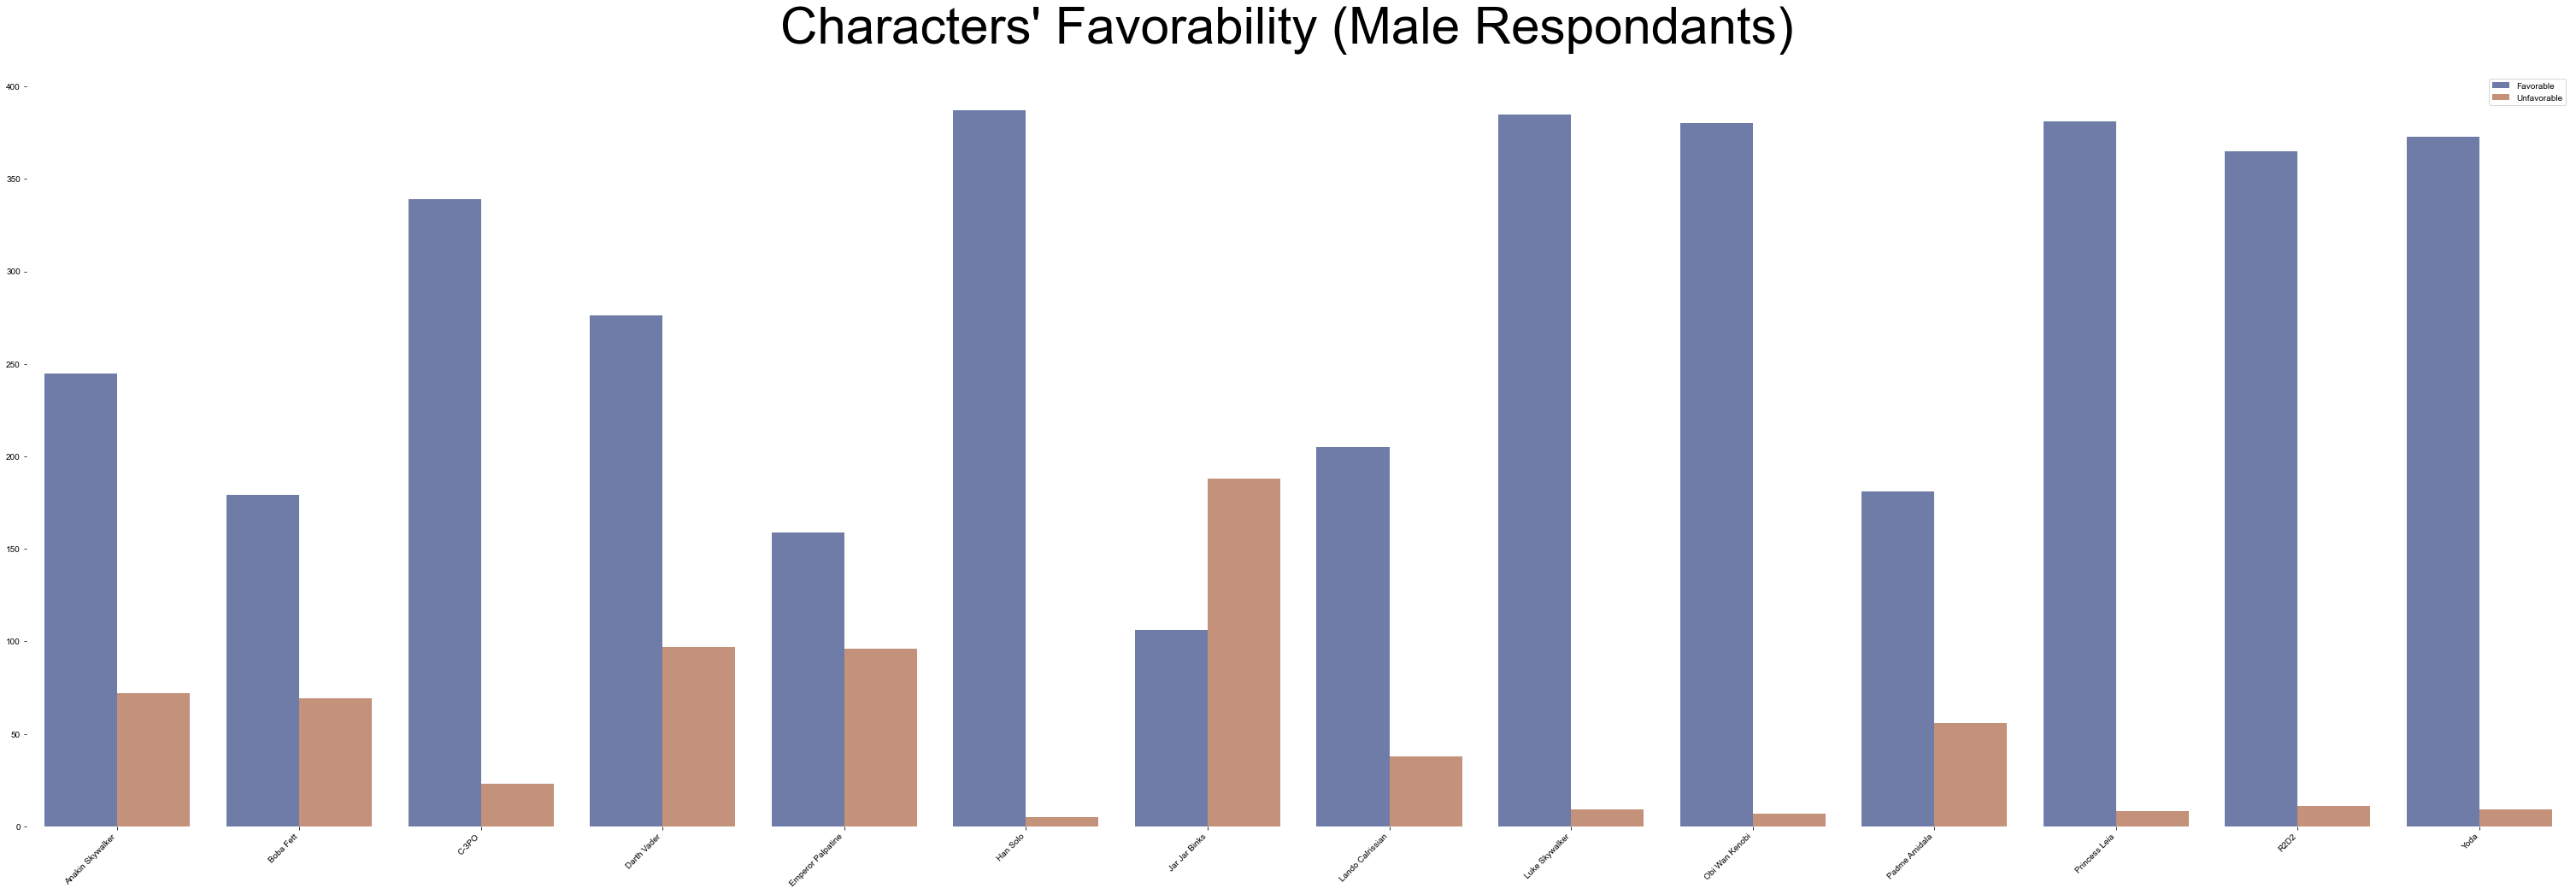

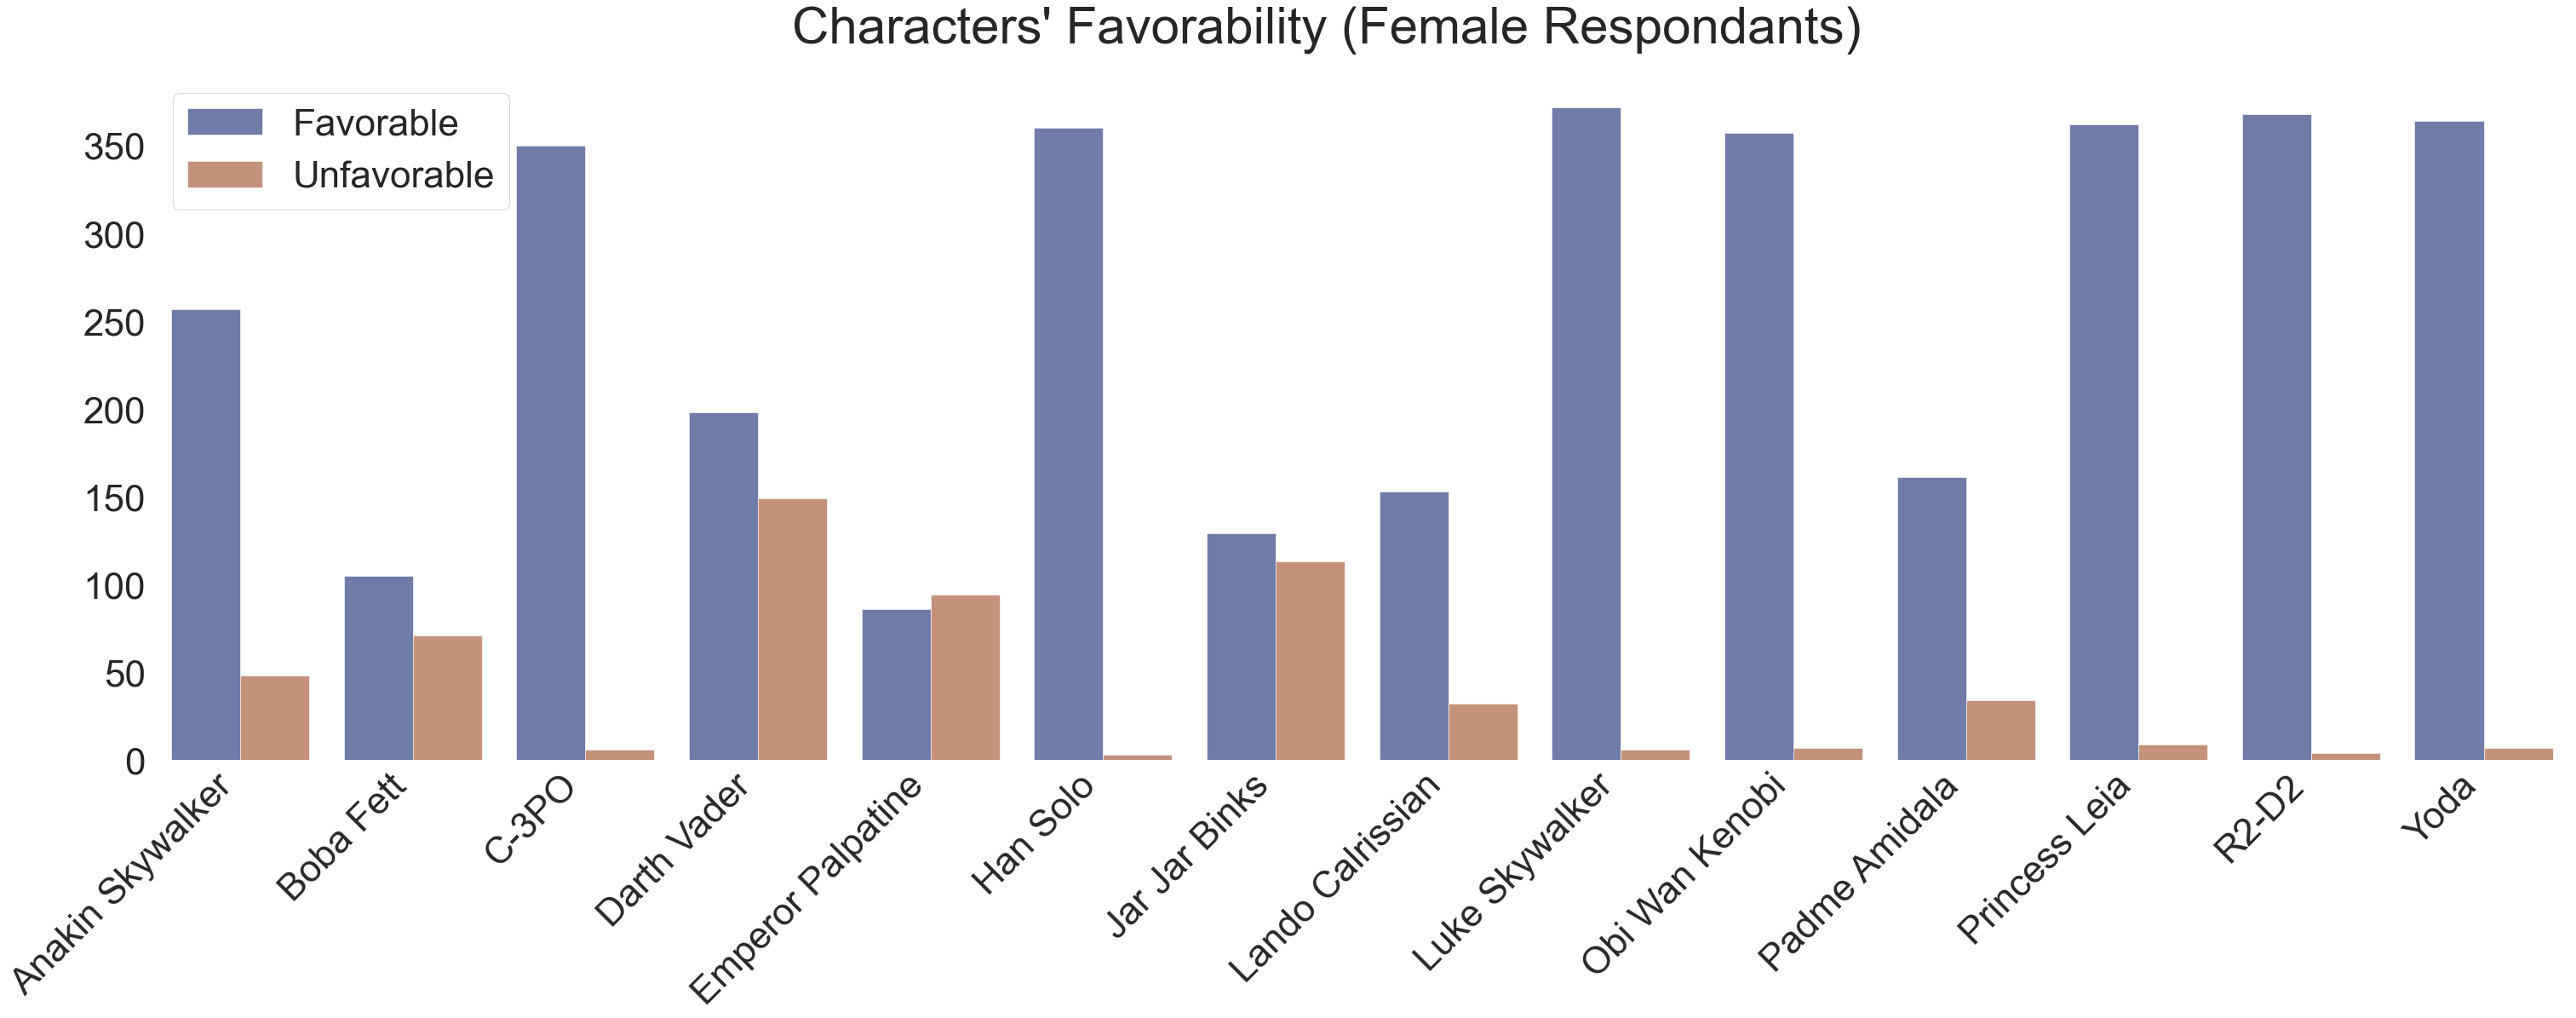

In [23]:
# Plot Male Responses
ax = sns.catplot(
                 data=char_male_groupby,
                 kind='bar',
                 x='variable',
                 y='value',
                 hue='level_1',
                 ci='sd',
                 palette='dark',
                 alpha=.6,
                 height=14,
                 aspect=3, 
                 legend_out=False
                )

# Plot Aesthetics
ax.set_xlabels('')
ax.set_ylabels('')
ax.set_xticklabels(
                   ['Anakin Skywalker', 'Boba Fett', 'C-3PO', 'Darth Vader', 'Emperor Palpatine', 'Han Solo',
                    'Jar Jar Binks','Lando Calrissian', 'Luke Skywalker', 'Obi Wan Kenobi', 'Padme Amidala',
                    'Princess Leia', 'R2D2', 'Yoda'],
                   rotation=45,
                   ha='right'
                  )
ax.fig.suptitle('Characters\' Favorability (Male Respondants)', size=60)
plt.subplots_adjust(top=.9, hspace=1)
ax.add_legend()
sns.set(font_scale=4, style='white')
sns.despine(bottom=True, left=True)

# Plot Female Responses
ax = sns.catplot(
                 data=char_female_groupby,
                 kind='bar',
                 x='variable', 
                 y='value',
                 hue='level_1',
                 ci='sd',
                 palette='dark',
                 alpha=.6,
                 height=14,
                 aspect=3,
                 legend_out=False
                )

# Plot Aesthetics
ax.set_xlabels('')
ax.set_ylabels('')
ax.set_xticklabels(
                   ['Anakin Skywalker', 'Boba Fett', 'C-3PO', 'Darth Vader', 'Emperor Palpatine', 'Han Solo',
                    'Jar Jar Binks','Lando Calrissian', 'Luke Skywalker', 'Obi Wan Kenobi', 'Padme Amidala',
                    'Princess Leia', 'R2-D2', 'Yoda'],
                    rotation=45,
                    ha="right"
                  )
ax.fig.suptitle('Characters\' Favorability (Female Respondants)', size=60)
plt.subplots_adjust(top=.9, hspace=1)
ax.add_legend()
sns.set(font_scale=4, style='white')
sns.despine(bottom=True, left=True)

### Observations

- The story's heros (Luke, Han, Leia, Obi Wan) are the favorites along with the friendly droids (R2-D2 & C-3PO)
<br>
- Males tend to like villains more than females (Boba Fett, Darth Vader, Emperor Palpatine)
<br>
- Anakin v. Darth Vader: Males view Vader more favorably than his "pre-turn-to-the-darkside" self while females
<br>
view Anakin more favorably.  
<br>
- Jar Jar Binks, a character widely critisized when he was introduced, has much more support among female fans.

## Favorite Character By Education Level

To do this we will assign the favorability ratingns a numeric value.  Then we will be able to take an average across the different education levels.

In [24]:
# Select the character columns
fav_char = star_wars.iloc[:, 15:29]

# Append 'Education' column
fav_char_edu = fav_char.join(star_wars['Education'])

fav_char_edu.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda,Education
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,High school degree
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor degree
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),High school degree
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Some college or Associate degree
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Some college or Associate degree


In [25]:
# Define function to assign a numeric value to character ratings
def char_func2(v):
    if v == 'Very favorably':
        return int(2)
    elif v == 'Somewhat favorably':
        return int(1)
    elif v == 'Neither favorably nor unfavorably (neutral)':
        return int(0)
    elif v == 'Very unfavorably' :
        return int(-2)
    elif v == 'Somewhat unfavorably':
        return int(-1)

# Use .apply to apply numeric favorability ratings to the each character column
for c in fav_char_edu.columns[0:14]:
    fav_char_edu[c] = fav_char_edu[c].apply(char_func2)
    
fav_char_edu.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda,Education
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,High school degree
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor degree
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High school degree
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0,Some college or Associate degree
5,2.0,1.0,1.0,-1.0,2.0,-2.0,1.0,0.0,2.0,1.0,1.0,-2.0,1.0,1.0,Some college or Associate degree


In [26]:
# Use .melt() to tranform the data
fav_char_edu_melt = pd.melt(fav_char_edu, id_vars='Education', value_vars=fav_char_edu.columns[0:14])
fav_char_edu_melt.head()

,Education,variable,value
0,High school degree,Han Solo,2.0
1,Bachelor degree,Han Solo,NaN
2,High school degree,Han Solo,1.0
3,Some college or Associate degree,Han Solo,2.0
4,Some college or Associate degree,Han Solo,2.0


In [27]:
# Further transform the  data set and take the average rating for each category subset
fav_char_edu_cols = fav_char_edu.columns
fav_char_edu_groupby = fav_char_edu_melt.groupby(['Education', 'variable'])['value'].apply(lambda x: x.mean()).reset_index()

fav_char_edu_groupby.head()

,Education,variable,value
0,Bachelor degree,Anakin Skywalker,0.708861
1,Bachelor degree,Boba Fett,0.376147
2,Bachelor degree,C-3P0,1.454902
3,Bachelor degree,Darth Vader,0.391473
4,Bachelor degree,Emperor Palpatine,0.000000


In [28]:
# Pivot the data so we can get it into sns.heatmap
fav_char_edu_pivot = fav_char_edu_groupby.pivot_table(index=['variable', 'Education'], values='value').unstack(level=0)
fav_char_edu_pivot

value                      \
variable                         Anakin Skywalker Boba Fett     C-3P0   
Education                                                               
Bachelor degree                          0.708861  0.376147  1.454902   
Graduate degree                          0.698565  0.137931  1.452055   
High school degree                       0.890625  0.500000  1.455882   
Less than high school degree             1.333333  1.000000  0.666667   
Some college or Associate degree         0.857143  0.450980  1.311741   

                                                                          \
variable                         Darth Vader Emperor Palpatine  Han Solo   
Education                                                                  
Bachelor degree                     0.391473          0.000000  1.718750   
Graduate degree                     0.330275         -0.058824  1.681818   
High school degree                  0.750000          0.163934  1.500000   
Less than high school degree        1.000000          0.666667  2.000000   
Some college or Associate degree    0.644000          0.185714  1.681452   

                                                                 \
variable                         Jar Jar Binks Lando Calrissian   
Education                                                         
Bachelor degree                      -0.361991         0.623810   
Graduate degree                      -0.382979         0.619883   
High school degree                   -0.047619         0.516667   
Less than high school degree         -1.000000         1.000000   
Some college or Associate degree     -0.013699         0.703349   

                                                                              \
variable                         Luke Skywalker Obi Wan Kenobi Padme Amidala   
Education                                                                      
Bachelor degree                        1.626923       1.713725      0.636364   
Graduate degree                        1.612613       1.663594      0.590361   
High school degree                     1.536232       1.470588      0.491803   
Less than high school degree           2.000000       2.000000      1.333333   
Some college or Associate degree       1.537849       1.600000      0.603960   

                                                                           
variable                         Princess Leia Organa     R2-D2      Yoda  
Education                                                                  
Bachelor degree                              1.565891  1.648649  1.608527  
Graduate degree                              1.569507  1.581818  1.684685  
High school degree                           1.492754  1.492537  1.617647  
Less than high school degree                 2.000000  1.000000  1.666667  
Some college or Associate degree             1.564000  1.525896  1.644898

In [29]:
# Change row order so its in order of education level
fav_char_edu_pivot = fav_char_edu_pivot.loc[['Graduate degree', 'Bachelor degree', 'Some college or Associate degree',
                                            'High school degree', 'Less than high school degree'], :]
fav_char_edu_pivot

value                      \
variable                         Anakin Skywalker Boba Fett     C-3P0   
Education                                                               
Graduate degree                          0.698565  0.137931  1.452055   
Bachelor degree                          0.708861  0.376147  1.454902   
Some college or Associate degree         0.857143  0.450980  1.311741   
High school degree                       0.890625  0.500000  1.455882   
Less than high school degree             1.333333  1.000000  0.666667   

                                                                          \
variable                         Darth Vader Emperor Palpatine  Han Solo   
Education                                                                  
Graduate degree                     0.330275         -0.058824  1.681818   
Bachelor degree                     0.391473          0.000000  1.718750   
Some college or Associate degree    0.644000          0.185714  1.681452   
High school degree                  0.750000          0.163934  1.500000   
Less than high school degree        1.000000          0.666667  2.000000   

                                                                 \
variable                         Jar Jar Binks Lando Calrissian   
Education                                                         
Graduate degree                      -0.382979         0.619883   
Bachelor degree                      -0.361991         0.623810   
Some college or Associate degree     -0.013699         0.703349   
High school degree                   -0.047619         0.516667   
Less than high school degree         -1.000000         1.000000   

                                                                              \
variable                         Luke Skywalker Obi Wan Kenobi Padme Amidala   
Education                                                                      
Graduate degree                        1.612613       1.663594      0.590361   
Bachelor degree                        1.626923       1.713725      0.636364   
Some college or Associate degree       1.537849       1.600000      0.603960   
High school degree                     1.536232       1.470588      0.491803   
Less than high school degree           2.000000       2.000000      1.333333   

                                                                           
variable                         Princess Leia Organa     R2-D2      Yoda  
Education                                                                  
Graduate degree                              1.569507  1.581818  1.684685  
Bachelor degree                              1.565891  1.648649  1.608527  
Some college or Associate degree             1.564000  1.525896  1.644898  
High school degree                           1.492754  1.492537  1.617647  
Less than high school degree                 2.000000  1.000000  1.666667

Text(0.5, 1.0, 'Character Rating By Eduction Level (-2 is Very Unfavorable, 2 is Very Favorable)')

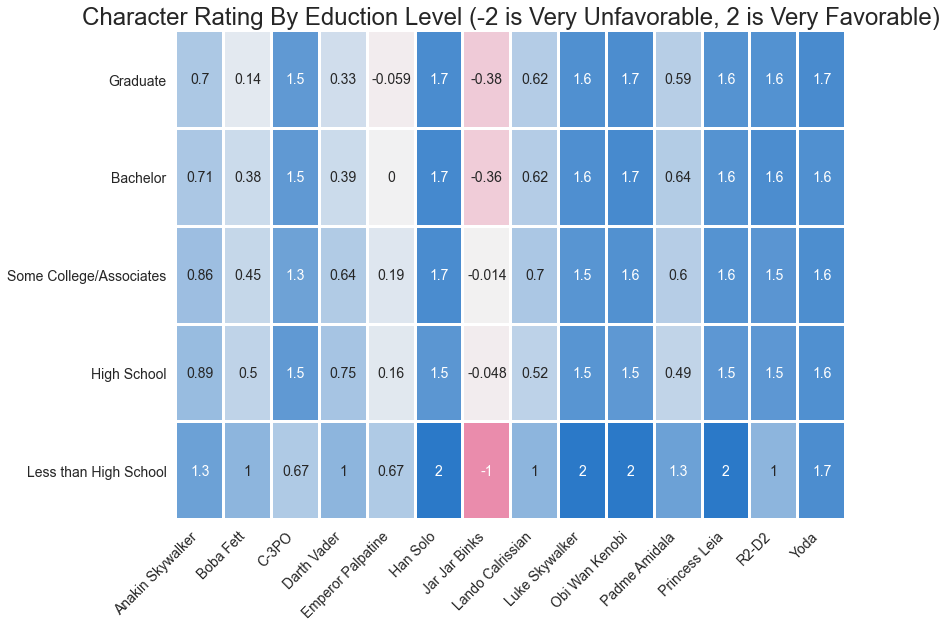

In [30]:
# Set custom diverging palette so that negative numers are red and positive numbers are blue
divpal = sns.diverging_palette(
                               0,
                               250,
                               sep=1,
                               n=256,
                               s=90,
                               as_cmap=True
                              )

# Plot
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(
            fav_char_edu_pivot,
            cmap=divpal, annot=True,
            lw=2,
            cbar=False,
            annot_kws={'fontsize':14},
            center=0
           )

# Plot Aesthetics
ax.set_xticklabels(
                   ['Anakin Skywalker', 'Boba Fett', 'C-3PO', 'Darth Vader', 'Emperor Palpatine',
                    'Han Solo', 'Jar Jar Binks', 'Lando Calrissian',
                    'Luke Skywalker', 'Obi Wan Kenobi', 'Padme Amidala', 'Princess Leia', 'R2-D2', 'Yoda'],
                    fontsize=14,
                    rotation=45,
                    ha='right'
                  )
ax.set_yticklabels(['Graduate', 'Bachelor', 'Some College/Associates', 'High School', 'Less than High School'],
                   fontsize=14)
ax.tick_params(left=False, bottom=False)
ax.set(xlabel='', ylabel='')
plt.title(
          'Character Rating By Eduction Level (-2 is Very Unfavorable, 2 is Very Favorable)',
          fontsize=24,
          fontweight=525
         )

### Observations

- Fans with less than a high school education tend to be more extreme in their ratings.
<br>
- Fans with less than a high school education tend to like the droids alot less than everyone else.
<br>
- Fans tend to dislike villains (Anakin, Palpatine, Bobba Fett, Vader) more as their education level increases.
<br>
- Jar Jar Binks is the only character with a negative rating across all education levels.
<br>
- Han is the highest rated

## Who Shot First - Han or Greedo?

This controversial debate among Star Wars enthusiasts relates to changes made to a scene with Han Solo and a bounty hunter named 'Greedo' from the original 1977 film.

In the original, Han shoots Greedo after Greedo threatens to take Han into custody.  In the 1997 re-release and newer versions, director George Lucas changed the scene by making it seem like Greedo shot at Han first and then Han shot back in self-defense.  

Lucas argued that it gave Han more justification for shooting Greedo while some fans felt it took away from one of Han's key character traits - moral ambiguity.  

Let's see if there is any variations between genders:

In [31]:
shot_gender = star_wars.loc[:,['Which character shot first?', 'Gender']]
shot_gender.head()

,Which character shot first?,Gender
1,I don't understand this question,Male
2,NaN,Male
3,I don't understand this question,Male
4,I don't understand this question,Male
5,Greedo,Male


In [32]:
# Further transform the data set
shot_gender_groupby = shot_gender.groupby(by='Which character shot first?')['Gender'].apply(lambda x: x.value_counts()).reset_index()
shot_gender_groupby

,Which character shot first?,level_1,Gender
0,Greedo,Male,103
1,Greedo,Female,90
2,Han,Male,200
3,Han,Female,122
4,I don't understand this question,Female,185
5,I don't understand this question,Male,120


In [33]:
# Change 'Gender' column name
shot_gender_groupby = shot_gender_groupby.rename(columns={'Gender':'Total'})
shot_gender_groupby

,Which character shot first?,level_1,Total
0,Greedo,Male,103
1,Greedo,Female,90
2,Han,Male,200
3,Han,Female,122
4,I don't understand this question,Female,185
5,I don't understand this question,Male,120


<ipython-input-34-e67c81867b6f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),fontsize=16)


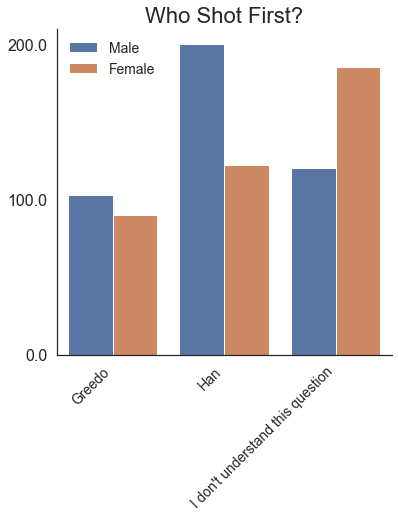

In [34]:
#Plot
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(
                 data=shot_gender_groupby,
                 x='Which character shot first?',
                 y='Total',
                 hue='level_1',
                 ci=None
                )

# Plot Aesthetics
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('', fontsize=18)
ax.set_xticklabels(
                   ['Greedo', 'Han', 'I don\'t understand this question'],
                   fontsize=14,
                   rotation=45,
                   ha="right"
                  )
ax.set_yticklabels(ax.get_yticks(),fontsize=16)
ax.set_title('Who Shot First?', fontsize=22)
sns.despine()
ax.grid(False)
ax.legend(frameon=False, markerscale=10, fontsize=14)

### Observations

- More females don't understand the question.  Most likely, only "die-hard" fans would be aware of this debate.  It might indicate that females tend to be less "die-hard" fans than men
<br>
- There is more of a disparity between men which might indicate that more men might be "purists" who base their answer on the original 1977 movie as released.  Women are more evenly split so they might be more ambiguous to the debate

## Conclusions

- Empire Strikes Back is the clear favorite and the most seen while Revenge of the Sith is the least favorite and the least seen
<br>
- Some people watch the movies out of order (by release date.
<br>
- Luke & Han are the favorites while the controversial Jar Jar Binks is the least favorite
<br>
- Males tend to like villains more than females.
<br>
- Fans with less than a high school education tend to be more extreme in their ratings and don't like the droids as much as everyone else.
<br>
- Fans tend to dislike villains (Anakin, Palpatine, Bobba Fett, Vader) more as their education level increases.


## Methodology Summary

- We took a data set from a Star Wars survey of over 1100 fans and learned some of the differences in opinions along gender lines and education level.  
- We used the following data analysis techniques:
    - Pandas aggregation using melt, groupby, and apply
    - Plotting with Seaborn and Matplotlib including custom aesthetics
    - Vectorized operations